In [282]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
#np.random.choice([0,1], p=[1/37,36/37], size=(150))

In [323]:
class Compartment:
    def __init__(self, MTTF, Duty_Cycle,MTTR): # αρχικοποίηση της κλάσης
        self.MTTF = MTTF
        self.Duty_Cycle = Duty_Cycle
        self.MTTR = MTTR
        self.is_working=1
    
    def refresh(self):
        if ( np.random.randint(self.MTTR)==0):
            if (self.is_working==1):
                self.is_working=0

In [300]:
C1=Compartment(37,0.7,10)
C2=Compartment(20,1,10)
C3=Compartment(20,1,10)
C4=Compartment(20,1,10)
C5=Compartment(37,0.7,10)

In [301]:
time=np.arange(0,150,0.1)
C1Reliability=np.exp(-time*(1/C1.MTTF))
p1=C1Reliability
C2Reliability=np.exp(-time*(1/C2.MTTF))
p2=C2Reliability

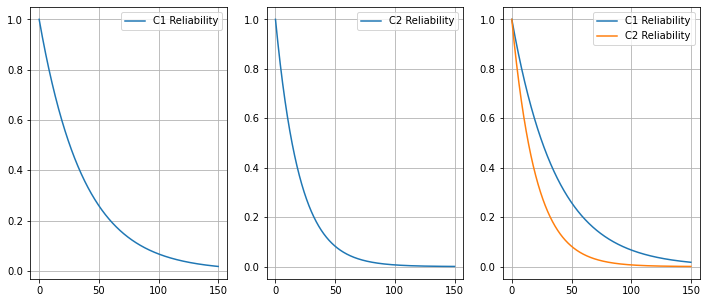

In [302]:
fig , ax = plt.subplots(1,3,figsize=(12,5) )
ax[0].plot(time,p1,label='C1 Reliability')
ax[0].grid()
ax[0].legend()


ax[1].plot(time,p2,label='C2 Reliability')
ax[1].grid()
ax[1].legend()


ax[2].plot(time,p1,label='C1 Reliability')
ax[2].plot(time,p2,label='C2 Reliability')
ax[2].grid()
ax[2].legend()

plt.show()

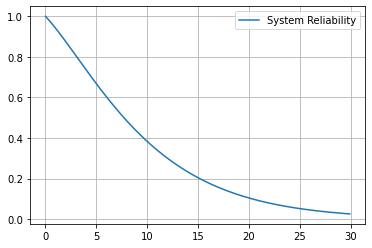

In [303]:
SystTime=np.arange(0,30,0.1)
plt.plot(SystTime,(p1*(3*p2**2-2*p2**3)*p1)[:300],label='System Reliability')
plt.grid()
plt.legend()
plt.show()

In [304]:
index=np.zeros(1000)
for j in range(0,1000):
    works=np.ones(150)
    for i in range(0,150):
        if (np.random.randint(C1.MTTF)==0):
            works[i+1:]=0
            index[j]=i
            #print(works)
            #print("Stooped working in iteration", i)
            break
print('Mean:',index.mean(),'\nMax:',index.max(),'\nMin:',index.min())

Mean: 33.502 
Max: 149.0 
Min: 0.0


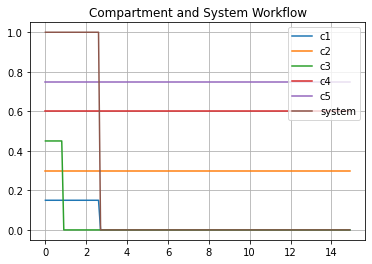

In [369]:
C1=Compartment(37,0.7,10)
C2=Compartment(20,1,10)
C3=Compartment(20,1,10)
C4=Compartment(20,1,10)
C5=Compartment(37,0.7,10)
working=np.ones(1500)
C1_working=np.ones(1500)*0.15
C2_working=np.ones(1500)*0.3
C3_working=np.ones(1500)*0.45
C4_working=np.ones(1500)*0.6
C5_working=np.ones(1500)*0.75


for i in range(0,time.shape[0]):
    if (   round( (i*0.1/C1.Duty_Cycle) % 1 , 2) ==0 ):
        C1.refresh()
        if (C1.is_working==0):
            C1_working[i-1:]=0
    if (   round( (i*0.1/C5.Duty_Cycle) % 1 , 2) ==0 ):
        C5.refresh()
        if (C5.is_working==0):
            C5_working[i-1:]=0
    if (   round( (i*0.1/C2.Duty_Cycle) % 1 , 2) ==0 ):
        C2.refresh()
        if (C2.is_working==0):
            C2_working[i-1:]=0
    if (   round( (i*0.1/C3.Duty_Cycle) % 1 , 2) ==0 ):
        C3.refresh()
        if (C3.is_working==0):
            C3_working[i-1:]=0
    if (   round( (i*0.1/C4.Duty_Cycle) % 1 , 2) ==0 ):
        C4.refresh()
        if (C4.is_working==0):
            C4_working[i-1:]=0
    if ( (C1.is_working and C5.is_working and (C2.is_working+C3.is_working+C4.is_working>1) ) != 1 ):
        working[i-1:]=0
        break
    if (working[i]==0):
        break
plt.plot(time[:150],C1_working[:150],label='c1')
plt.plot(time[:150],C2_working[:150],label='c2')
plt.plot(time[:150],C3_working[:150],label='c3')
plt.plot(time[:150],C4_working[:150],label='c4')
plt.plot(time[:150],C5_working[:150],label='c5')
plt.plot(time[:150],working[:150],label='system')
plt.title('Compartment and System Workflow')
plt.grid()
plt.legend()
plt.show()